In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [2]:
file_name = "iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [6]:
NUM_ITER = 50
lr = 0.01

<h2>Define Placeholder and Variables</h2>

In [7]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[105,2], name='X')
Y = tf.placeholder(tf.float32, shape=[105,1], name='Y')
W = tf.Variable(tf.random_normal([2,1]), tf.float32, name='W')
b = tf.Variable(tf.zeros([1,1]), tf.float32, name='b')

<h2>Define update rule and accuracy</h2>

In [8]:
# define the predicted output label use round to simple
Y_hat = tf.round(tf.sigmoid(tf.add(tf.matmul(X, W), b)))
# the error between target and logit
error = Y - Y_hat

# weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X), error)
db = tf.reduce_sum(error,0)
W_ = W + lr * dW
b_ = b + lr * db

# group two operations together
step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training</h2>

In [9]:
#initialize tensorflow variables
init = tf.global_variables_initializer()
acc_list = np.zeros([NUM_ITER])

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step, feed_dict = {X:x_train_1, Y:y_train_1})
        err_eval = sess.run(error, feed_dict = {X:x_train_1, Y:y_train_1})
        error_rate = float(np.count_nonzero(err_eval)) / err_eval.shape[0]
        acc_list[i] = 1 - error_rate
        
    W = sess.run(W)
    b = sess.run(b)

In [10]:
W = np.squeeze(W)
b = np.squeeze(b)
print('W =', W)
print('b =', b)

W = [ 0.4519995 -1.024646 ]
b = -0.3599999


<h2>Plot</h2>

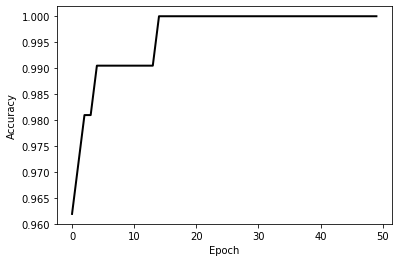

In [11]:
plot_x = range(NUM_ITER)
plot_y = acc_list
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

<h1>Part b:</h1>

In [13]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [14]:
NUM_ITER = 100
lr = 0.01

<h2>Define Placeholder and Variables</h2>

In [15]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[105,2], name='X')
Y = tf.placeholder(tf.float32, shape=[105,1], name='Y')
W = tf.Variable(tf.random_normal([2,1]), tf.float32, name='W')
b = tf.Variable(tf.zeros([1,1]), tf.float32, name='b')

<h2>Define update rule and accuracy</h2>

In [16]:
# define the predicted output label
Y_hat = tf.round(tf.sigmoid(tf.add(tf.matmul(X, W), b)))
# the error between target and logit
error = Y - Y_hat

# weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X), error)
db = tf.reduce_sum(error,0)
W_ = W + lr * dW
b_ = b + lr * db

# group two operations together
step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training</h2>

In [17]:
#initialize tensorflow variables
init = tf.global_variables_initializer()
acc_list = np.zeros([NUM_ITER])

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step, feed_dict = {X:x_train_2, Y:y_train_2})
        err_eval = sess.run(error, feed_dict = {X:x_train_2, Y:y_train_2})
        error_rate = float(np.count_nonzero(err_eval)) / err_eval.shape[0]
        acc_list[i] = 1 - error_rate
        
    W = sess.run(W)
    b = sess.run(b)

In [18]:
W = np.squeeze(W)
b = np.squeeze(b)
print('W =', W)
print('b =', b)

W = [-0.0918338  1.1709008]
b = -0.4899999


<h2>Plot</h2>

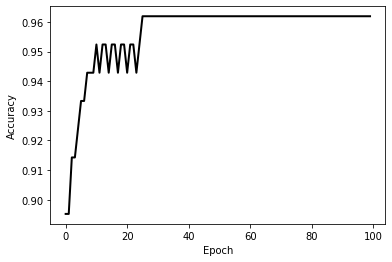

In [19]:
plot_x = range(NUM_ITER)
plot_y = acc_list
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

<h1>Part c:</h1>

In [21]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [22]:
NUM_ITER = 100
lr = 0.01

<h2>Define placehoder and variables</h2>

In [26]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[None,4], name='X')
Y = tf.placeholder(tf.float32, shape=[None,3], name='Y')
W1 = tf.Variable(tf.random_normal([4,256]), tf.float32, name='W1')
W2 = tf.Variable(tf.random_normal([256,128]), tf.float32, name='W2')
W3 = tf.Variable(tf.random_normal([128,3]), tf.float32, name='W3')
b1 = tf.Variable(tf.zeros([256]), tf.float32, name='b1')
b2 = tf.Variable(tf.zeros([128]), tf.float32, name='b2')
b3 = tf.Variable(tf.zeros([3]), tf.float32, name='b3')

<h2>Define the neural network</h2>

In [27]:
l1_out = tf.nn.relu(tf.add(tf.matmul(X,W1), b1))
l2_out = tf.nn.relu(tf.add(tf.matmul(l1_out, W2), b2))
out = tf.add(tf.matmul(l2_out, W3), b3)

<h2>Define cost function and accuracy</h2>

In [ ]:
#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=out, labels=Y))
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(out, 1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h2>Execute training</h2>

<h2>Plot</h2>